In [4]:
import pandas as pd 
df=pd.read_csv('titanic.csv')
df.head() #show the first 5 rows
df.tail(10) #show last 10 rows
df.info() 
df.shape #show number of rows and columns
df.describe() #min,std,min,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#handling miising values
df.isnull().sum() #count missing values per column
df.isna() #columns

df.dropna(inplace=True) #drop rows


df['Age']=df['Age'].fillna(df['Age'].mean()) #replace it with mean
df.ffill(inplace=True) #forward fill bfill for bw fill

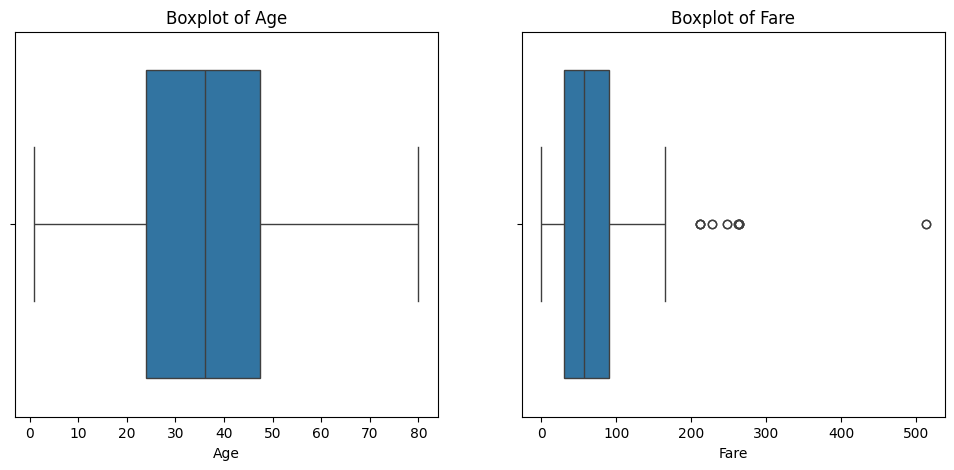

In [ ]:
#Detect and remove outliers using boxplots and IQR method
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(12,5)) #Creates a new figure with a size of 12x5 inches
plt.subplot(1,2,1) 
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.show()

In [7]:
#Q1 (25th percentile): The value below which 25% of the data falls.
#Q3 (75th percentile): The value below which 75% of the data falls.
#IQR = Q3 - Q1: The middle 50% of the data.
#Outliers are defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile (Q1)
    Q3 = df[column].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply to Age and Fare columns
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

print("Outliers removed. Cleaned dataset:")
print(df.head())

Outliers removed. Cleaned dataset:
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

In [8]:
import pandas as pd

# Sample dataset (Replace with your actual Titanic dataset)
df = pd.read_csv("train.csv")  # Load dataset

# 📌 1️⃣ Create 'Age Group' Feature
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# 📌 2️⃣ Create 'Family Size' Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger

# 📌 3️⃣ Create 'IsAlone' Feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # 1 if alone, 0 otherwise

# 📌 4️⃣ Extract 'Title' from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)  # Extract title from Name

# 📌 5️⃣ Display first few rows
print(df[['Age', 'AgeGroup', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Title']].head())

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

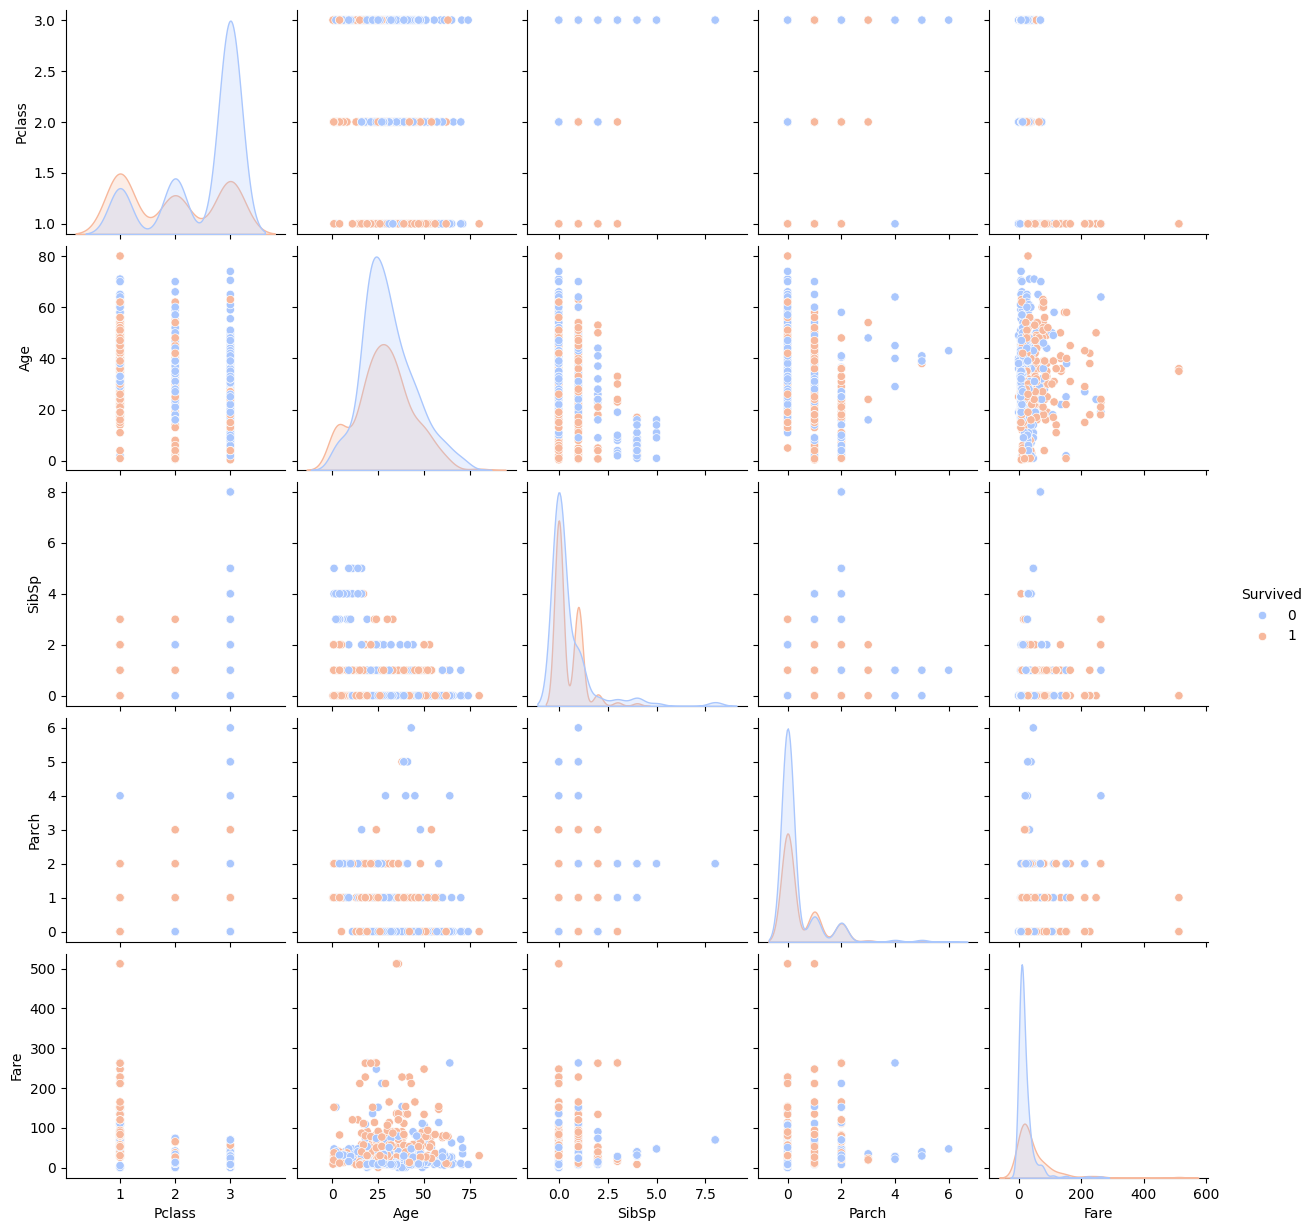

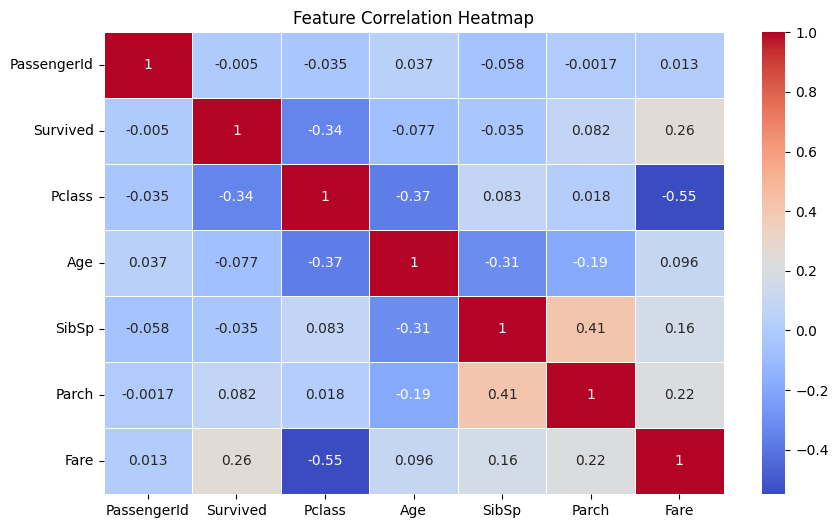

C:\Users\Pavana Ganga S\AppData\Local\Temp\ipykernel_2764\2606927616.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="viridis")


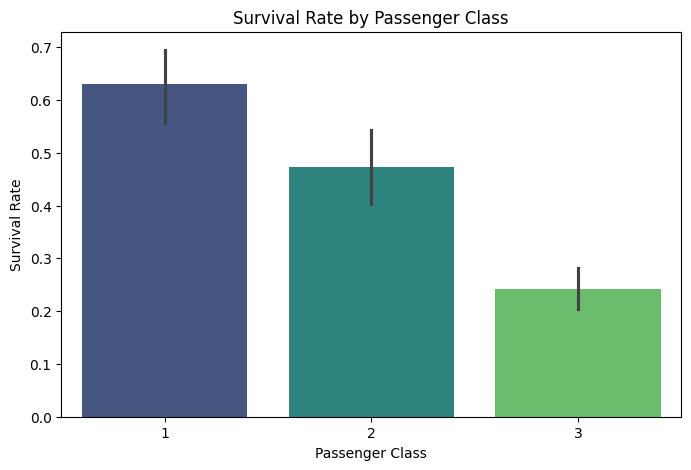

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Pairplot: Visualizing relationships
sns.pairplot(numeric_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette='coolwarm')
plt.show()

# Heatmap: Correlation matrix (using only numerical columns)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Barplot: Survival Rate by Passenger Class
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


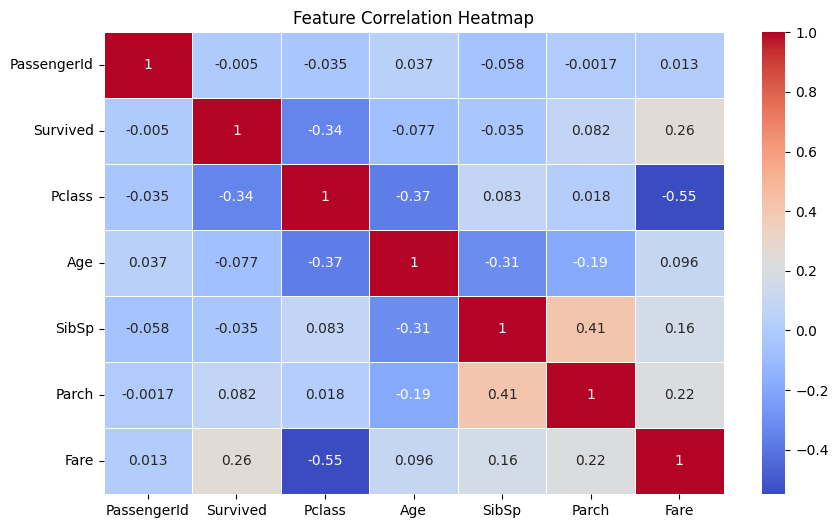


📌 Highly Correlated Features (>|0.7|):


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("train.csv")

# Select only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Find highly correlated features (absolute correlation > 0.7)
threshold = 0.7
highly_correlated = [(i, j, correlation_matrix.loc[i, j]) 
                     for i in correlation_matrix.columns 
                     for j in correlation_matrix.columns 
                     if i != j and abs(correlation_matrix.loc[i, j]) > threshold]

# Remove duplicate pairs (since correlation is symmetric)
unique_correlations = set()
for feature1, feature2, corr_value in highly_correlated:
    if (feature2, feature1, corr_value) not in unique_correlations:
        unique_correlations.add((feature1, feature2, corr_value))

# Display highly correlated features
print("\n📌 Highly Correlated Features (>|0.7|):")
for feature1, feature2, corr_value in unique_correlations:
    print(f"{feature1} ↔ {feature2} | Correlation: {corr_value:.2f}")
